### Importing packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as olt

### Importing dataset

In [2]:
ds=pd.read_csv("Salary_Data_LR.csv")

In [3]:
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Visualize the dataset

Text(0, 0.5, 'Salary')

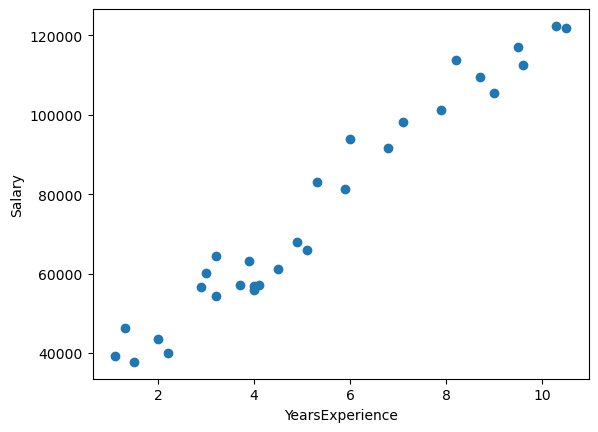

In [4]:
olt.scatter(ds['YearsExperience'],ds['Salary'])
olt.xlabel('YearsExperience')
olt.ylabel('Salary')

### Correlation

In [5]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Dependent and independent feature

In [6]:
X=ds[['YearsExperience']]  #x is not in one column row so it is in 2d 
y=ds['Salary'] #can be in series or in 1D

### Train-Test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Standardisation
$  \Large Zscore = \frac{x_i - \mu}{\sigma}  $
#### To reduce the highest value we apply std to all independent feature

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) 

 #### Only transform the value used in train to stop the data leakage(knowing something about test data [here mean])
 #### If we fit in test data it find mean for test data separately which is not required for us

In [10]:
X_test=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression() #n_jobs=-1 is a parameter which use to stop other process done by our processor
regression.fit(X_train,y_train)

LinearRegression()

#### Printing the return value of linear regression

In [12]:
print(regression.coef_)
print(regression.intercept_)

[25511.6333602]
71057.33333333333


#### Plotting the prediction value


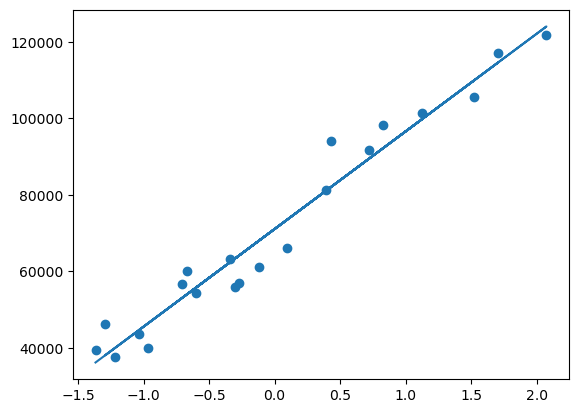

In [13]:
olt.scatter(X_train,y_train)
olt.plot(X_train,regression.predict(X_train))

#### Prediction value

In [14]:
y_pred=regression.predict(X_test)


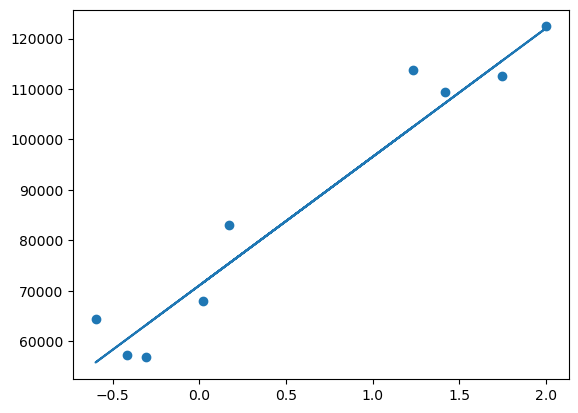

In [15]:
olt.scatter(X_test,y_test)
olt.plot(X_test,y_pred)

### Performance Metrics

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse= mean_squared_error(y_test,y_pred)
mse

37784662.46621314

In [17]:
mae=mean_absolute_error(y_test,y_pred)
mae

5161.328710400183

In [18]:
rmse=np.sqrt(mse)
rmse

6146.92300799458

## Rsquare
$ R^2= \frac{SSR}{SST} $
### where SSR= Sum of squares of residuals 
### SST= Total sum of square of residuals

In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9414466227178214

In [20]:
regression.predict(scaler.transform([[5]]))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([72613.84695397])

In [21]:
ds.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
